In [46]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.6-classifying-newswires.ipynb
import keras
keras.__version__

'2.2.4'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 4s 2us/step


In [5]:
print('train data size:',len(train_data))
print('test data size:',len(test_data))

train data size: 8982
test data size: 2246


In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 2s 4us/step


In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [16]:
x_train.shape

(8982, 10000)

In [17]:
train_labels.shape

(8982,)

In [18]:
max(train_labels)

45

In [28]:
lable_dim = max(train_labels)+1
def to_one_hot(labels, dimension = lable_dim) :
    results = np.zeros((len(labels),dimension))
    print(results.shape)
    for i, label in enumerate(labels) :
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

(8982, 46)
(2246, 46)


In [29]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [30]:
one_hot_train_labels.shape

(8982, 46)

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 275us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 86us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.4626 - acc: 0.9034 - val_loss: 0.9092 - val_acc: 0.8030
Epoch 

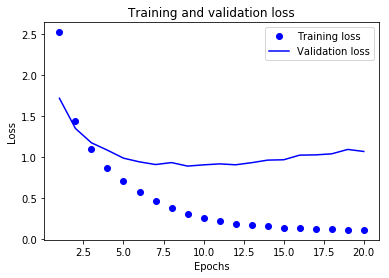

In [37]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

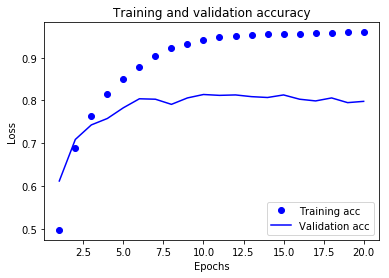

In [38]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 112us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 108us/step - loss: 1.3711 - acc: 0.7121 - val_loss: 1.2755 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 79us/step - loss: 1.0137 - acc: 0.7790 - val_loss: 1.1296 - val_acc: 0.7540
Epoch 4/8
7982/7982 [==============================] - 1s 80us/step - loss: 0.7975 - acc: 0.8254 - val_loss: 1.0541 - val_acc: 0.7600
Epoch 5/8
7982/7982 [==============================] - 1s 81us/step - loss: 0.6391 - acc: 0.8629 - val_loss: 0.9747 - val_acc: 0.7930
Epoch 6/8
7982/7982 [==============================] - 1s 75us/step - loss: 0.5116 - acc: 0.8929 - val_loss: 0.9092 - val_acc: 0.8160
Epoch 7/8
7982/7982 [==============================] - 1s 83us/step - loss: 0.4112 - acc: 0.9141 - val_loss: 0.8937 - val_acc: 0.8210
Epoch 8/8
22

In [40]:
results

[0.9838238072416555, 0.7849510240427426]

In [47]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
print(test_labels[:10], test_labels_copy[:10])
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

[ 3 10  1  4  4  3  3  3  3  3] [16  3 19  3  2  1  3  3  4  3]


0.1834372217275156

In [42]:
predictions = model.predict(x_test)


In [43]:
predictions[0].shape


(46,)

In [44]:
np.sum(predictions[0])


1.0

In [45]:
np.argmax(predictions[0])


3